# CS-651-A TEXT BASED ANALYSIS
# Sai Vandana - 0939231
# Classwork - 2 4/13/2024

 # Read the csv file
    The below CSV file is related to UN General Debates, which often contain data about speeches or statements made at the United Nations General Assembly. In the following steps we perform data cleaning then some of the visualizations.

In [33]:
import pandas as pd
df = pd.read_csv(r"C:\Users\tsaiv\OneDrive\Desktop/un-general-debates-blueprint.csv")
df.head(20)


,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


### Get the column names

In [35]:
df.columns


Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text'],
      dtype='object')

### Get the datatypes for each column

In [37]:
df.dtypes

session          int64
year             int64
country         object
country_name    object
speaker         object
position        object
text            object
dtype: object

### Information about each column

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
dtypes: int64(2), object(5)
memory usage: 410.7+ KB


### The describe() function to generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset distribution.

In [41]:
df.describe()

,session,year
count,7507.000000,7507.000000
mean,49.610763,1994.610763
std,12.892155,12.892155
min,25.000000,1970.000000
25%,39.000000,1984.000000
50%,51.000000,1996.000000
75%,61.000000,2006.000000
max,70.000000,2015.000000


### Add a new column with the length of the “text” column

In [43]:
df['length'] = df['text'].str.len()
df.describe()


,session,year,length
count,7507.000000,7507.000000,7507.000000
mean,49.610763,1994.610763,17967.281604
std,12.892155,12.892155,7860.038463
min,25.000000,1970.000000,2362.000000
25%,39.000000,1984.000000,12077.000000
50%,51.000000,1996.000000,16424.000000
75%,61.000000,2006.000000,22479.500000
max,70.000000,2015.000000,72041.000000


###   stats about text fields

In [45]:
df.describe(include='O')


,country,country_name,speaker,position,text
count,7507,7507,7480,4502,7507
unique,199,199,5428,113,7507
top,ALB,Albania,Seyoum Mesfin,Minister for Foreign Affairs,33: May I first convey to our President the co...
freq,46,46,12,1813,1


### check for missing data

In [47]:
df.isna().sum()


session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

#### To fill 'unknown' in place of empty spots

In [49]:
df['speaker'].fillna('unknown', inplace=True)
df['position'].fillna('unknown', inplace=True)
df.isna().sum()


C:\Users\tsaiv\AppData\Local\Temp\ipykernel_18148\401339355.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['speaker'].fillna('unknown', inplace=True)
C:\Users\tsaiv\AppData\Local\Temp\ipykernel_18148\401339355.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

session         0
year            0
country         0
country_name    0
speaker         0
position        0
text            0
length          0
dtype: int64

### convert string to uppercase letters

In [51]:
df['speaker']= df['speaker'].str.upper()
df['position'] = df['position'].str.upper()
df['text'] = df['text'].str.upper()
df

,session,year,country,country_name,speaker,position,text,length
0,25,1970,ALB,Albania,MR. NAS,UNKNOWN,33: MAY I FIRST CONVEY TO OUR PRESIDENT THE CO...,51419
1,25,1970,ARG,Argentina,MR. DE PABLO PARDO,UNKNOWN,177.\t : IT IS A FORTUNATE COINCIDENCE THAT PR...,29286
2,25,1970,AUS,Australia,MR. MCMAHON,UNKNOWN,100.\t IT IS A PLEASURE FOR ME TO EXTEND TO Y...,31839
3,25,1970,AUT,Austria,MR. KIRCHSCHLAEGER,UNKNOWN,155.\t MAY I BEGIN BY EXPRESSING TO AMBASSADO...,26616
4,25,1970,BEL,Belgium,MR. HARMEL,UNKNOWN,"176. NO DOUBT EACH OF US, BEFORE COMING UP TO ...",25911
...,...,...,...,...,...,...,...,...
7502,70,2015,YEM,Yemen,MR. ABDRABUH MANSOUR HADI MANSOUR,PRESIDENT,ON BEHALF OF THE PEOPLE AND THE GOVERNMENT OF ...,10568
7503,70,2015,YUG,Yugoslavia,MR. TOMISLAV NIKOLIĆ,PRESIDENT,\nSEVENTY YEARS HAVE PASSED SINCE THE ESTABLIS...,25430
7504,70,2015,ZAF,South Africa,JACOB ZUMA,PRESIDENT,I SHOULD LIKE TO CONGRATULATE THE PRESIDENT AN...,13662
7505,70,2015,ZMB,Zambia,MR. EDGAR CHAGWA LUNGU,PRESIDENT,I WOULD LIKE TO BEGIN BY THANKING THE SECRETAR...,14247


### print the speakers with ‘BUSH’ in them

In [53]:
df[df['speaker'].str.contains('BUSH')]


,session,year,country,country_name,speaker,position,text,length
2720,44,1989,USA,United States,BUSH,PRESIDENT,﻿I AM HONOURED TO ADDRESS THE GENERAL ASSEMBLY...,19779
2876,45,1990,USA,United States,GEORGE BUSH,UNKNOWN,﻿\nIT IS REALLY A GREAT PRIVILEGE TO GREET YOU...,15843
3038,46,1991,USA,United States,GEORGE BUSH,PRESIDENT,﻿I AM HONOURED TO SPEAK WITH YOU AS YOU OPEN T...,15555
3207,47,1992,USA,United States,MR. GEORGE BUSH,PRESIDENT,"FORTY-SEVEN YEARS AGO I WAS A YOUNG MAN OF 21,...",21105
4814,56,2001,USA,United States,GEORGE W. BUSH,PRESIDENT,﻿WE MEET IN A HALL DEVOTED TO\nPEACE; IN A CIT...,14724
5002,57,2002,USA,United States,MR. GEORGE W. BUSH,PRESIDENT,﻿WE MEET ONE YEAR AND ONE DAY\nAFTER A TERRORI...,16684
5191,58,2003,USA,United States,GEORGE W. BUSH,PRESIDENT,"﻿TWENTY-FOUR MONTHS AGO, AND\nYESTERDAY IN THE...",16962
5382,59,2004,USA,United States,MR. GEORGE W BUSH,PRESIDENT,THANK YOU FOR THE HONOUR OF\nADDRESSING THE GE...,18628
5760,61,2006,USA,United States,MR. GEORGE W. BUSH,PRESIDENT,I AM GRATEFUL FOR THE PRIVILEGE OF \nSPEAKING ...,16675
5951,62,2007,USA,United States,GEORGE W. BUSH,PRESIDENT,THANK YOU FOR THE OPPORTUNITY \nTO ADDRESS THE...,15483


## Visualization graphs
#### This code creates a line plot of the data in the column 'length'. It connects data points with a continuous line, making it easy to see trends, fluctuations, and patterns.

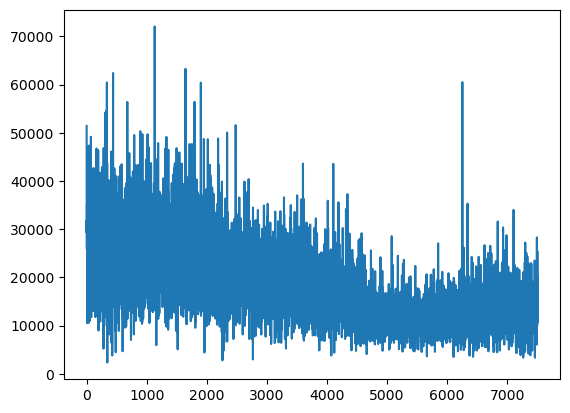

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
# For the line plot
df['length'].plot()
plt.show() 

### This code generates a box plot with the orientation set to horizontal. It shows the median, quartiles, and possible outliers.

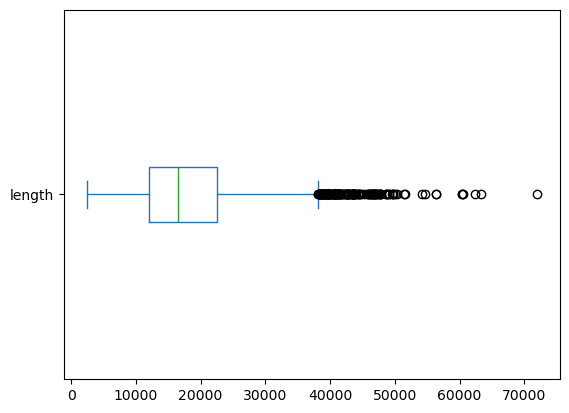

In [57]:
# For the horizontal box plot
df['length'].plot(kind='box', vert=False)
plt.show()  # To display the plot

### Histogram to represent the distribution of numerical data by dividing the data into bins or intervals.

<Axes: ylabel='Frequency'>

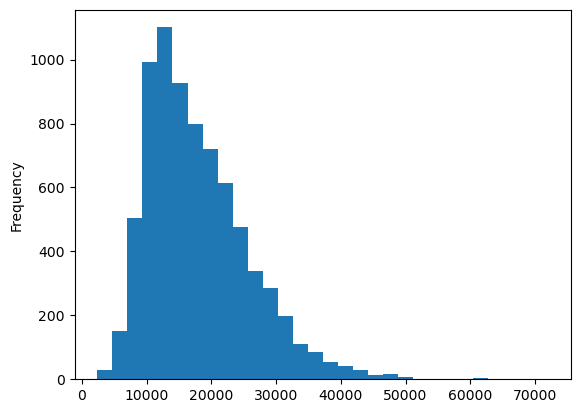

In [59]:
df['length'].plot(kind='hist', bins=30)


### Box plot for the 'length' column filtered by specific countries.

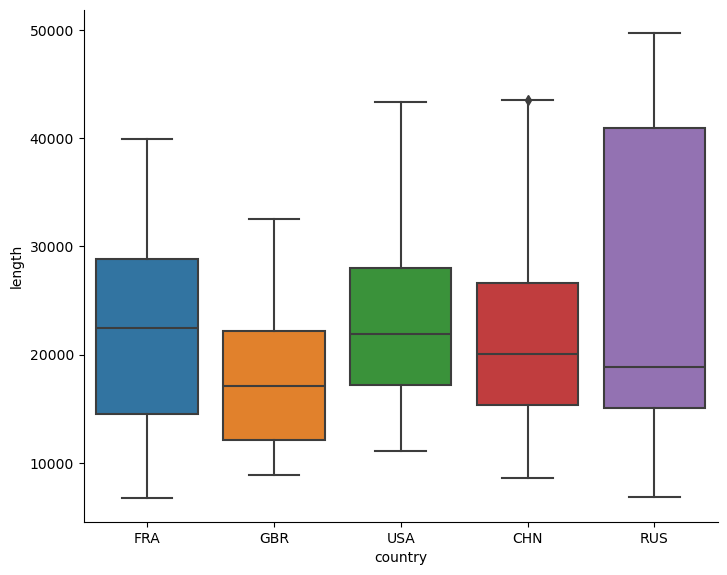

In [61]:
import seaborn as sns 
where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
g = sns.catplot(data=df[where], x="country", y="length", kind='box')
g.fig.set_size_inches(8, 6)


### The function tokenize uses the regex module to find and return all the word-like substrings in the input text.

In [71]:
import regex as re
def tokenize(column):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)


### Sample text to perform tokenize function

In [75]:
import regex as re

def tokenize(column):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', column)

testtext = "Let's defeat SARS-CoV-2 together in 2020! www.cdc.gov"
testtokens = tokenize(testtext)

print(testtokens)



['Let', 's', 'defeat', 'SARS-CoV-2', 'together', 'in', 'www', 'cdc', 'gov']


### List of English stop words that are standard in python 

In [77]:
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)


{'with', 'more', 'hasn', 'what', 'if', "doesn't", 'had', 'ain', 'to', 'between', 'doesn', 'shan', 'very', 'me', 'who', "don't", 'couldn', 'himself', 'into', 'in', 'hadn', 'doing', 'up', 'during', 'out', 'these', 'all', 'so', 'above', 'through', "hadn't", 'we', 'myself', 'were', 'been', 'where', "needn't", 'nor', 'whom', 'are', 'any', "mightn't", 'their', 'you', "it's", 'both', "you'll", 'themselves', 'ma', 'other', 'my', 'theirs', "wasn't", 'this', 'do', 'i', "should've", 'a', 'won', 'under', 'each', 'm', 'don', 'll', 'off', 'below', "weren't", 'few', 'aren', 'once', 'wouldn', 'then', "didn't", 'as', 'our', 'only', 'has', 's', 'no', 'when', 'him', "wouldn't", 'have', 'because', 're', 'most', 'some', 'after', 'it', 'such', 'ours', 'further', 'here', 'over', 'before', 'an', 'o', "isn't", 't', 'down', 'of', 'they', 'be', 'can', 'her', "she's", 'mightn', 'against', 'same', 'for', 'needn', 'mustn', 'weren', 'ourselves', 'yours', 'but', 've', 'why', 'did', 'herself', 'shouldn', "won't", 'tho

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tsaiv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Function to remove stop words

In [79]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
#Just testing it
cleantokens= remove_stop(testtokens)
print(cleantokens)


['Let', 'defeat', 'SARS-CoV-2', 'together', 'www', 'cdc', 'gov']


### Creating a pipeline

In [81]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


### Run the pipeline

In [83]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)


### Count the tokens and print last 5 rows in dataset

In [86]:
df['num_tokens'] = df['tokens'].map(len)
df.tail()

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens
7502,70,2015,YEM,Yemen,MR. ABDRABUH MANSOUR HADI MANSOUR,PRESIDENT,ON BEHALF OF THE PEOPLE AND THE GOVERNMENT OF ...,10568,"[behalf, people, government, yemen, would, lik...",894
7503,70,2015,YUG,Yugoslavia,MR. TOMISLAV NIKOLIĆ,PRESIDENT,\nSEVENTY YEARS HAVE PASSED SINCE THE ESTABLIS...,25430,"[seventy, years, passed, since, establishment,...",2118
7504,70,2015,ZAF,South Africa,JACOB ZUMA,PRESIDENT,I SHOULD LIKE TO CONGRATULATE THE PRESIDENT AN...,13662,"[like, congratulate, president, country, denma...",1160
7505,70,2015,ZMB,Zambia,MR. EDGAR CHAGWA LUNGU,PRESIDENT,I WOULD LIKE TO BEGIN BY THANKING THE SECRETAR...,14247,"[would, like, begin, thanking, secretary-gener...",1197
7506,70,2015,ZWE,Zimbabwe,ROBERT MUGABE,PRESIDENT,ALLOW ME AT THE OUTSET TO EXTEND TO MR. MOGENS...,11013,"[allow, outset, extend, mr, mogens, lykketoft,...",903


### To count the words

In [88]:
from collections import Counter

tokens = tokenize("She likes my cats and my cats like my sofa.")

testcount= Counter(tokens)
print(testcount)


Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


 ### Add new data to the current count

In [90]:
more_tokens = tokenize("She likes dogs and cats.")
testcount.update(more_tokens)
print(testcount)


Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


### Counting the most common elements

In [92]:
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))


[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]


### word frequency

In [96]:
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'


### Sort and display

In [98]:
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)


,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


### Code to describe the data

In [92]:
freq_df.describe()


,freq
count,35797.000000
mean,61.650390
std,422.813421
min,1.000000
25%,1.000000
50%,3.000000
75%,15.000000
max,24828.000000


### Bar chart between frequency and token

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

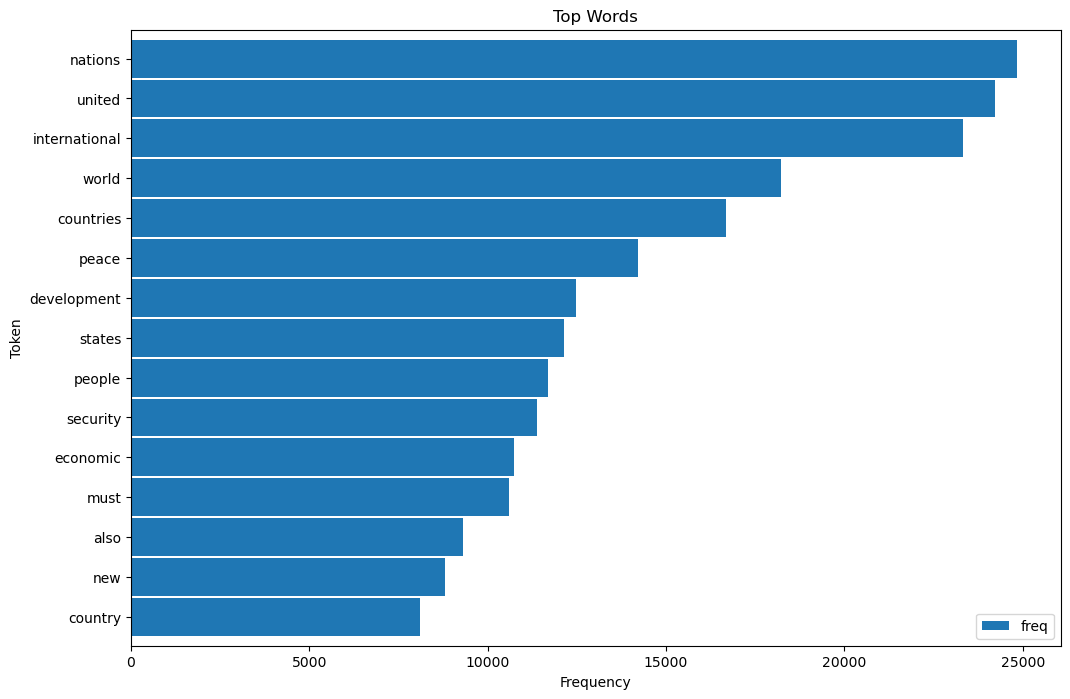

In [93]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')


In [94]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


### program to print Word cloud

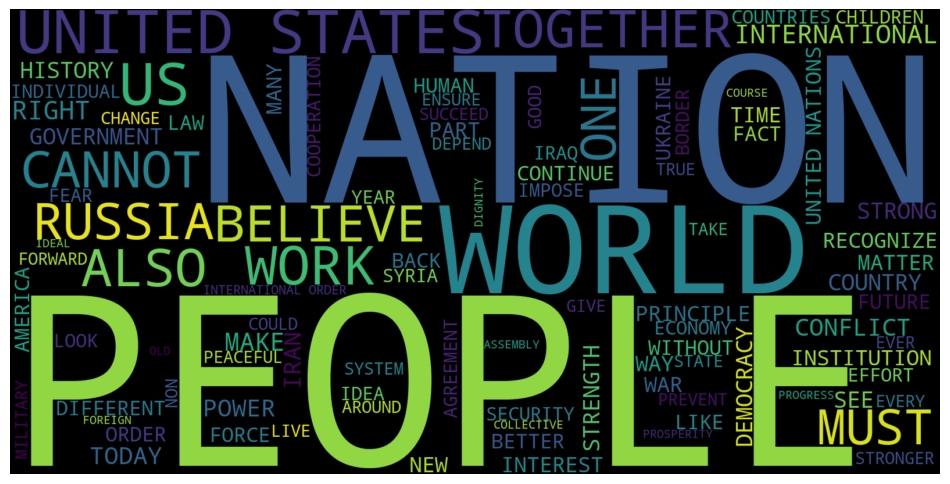

In [103]:

from wordcloud import WordCloud
from matplotlib import pyplot as plt

# Assuming df is your DataFrame and stopwords is a set of stopwords
text = df.query("year==2015 and country=='USA'")['text'].values[0]

plt.figure(figsize=(12, 8))  # Increase figure size for better resolution
wc = WordCloud(width=1600, height=800, max_words=100, stopwords=stopwords).generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


#### Another example for word cloud

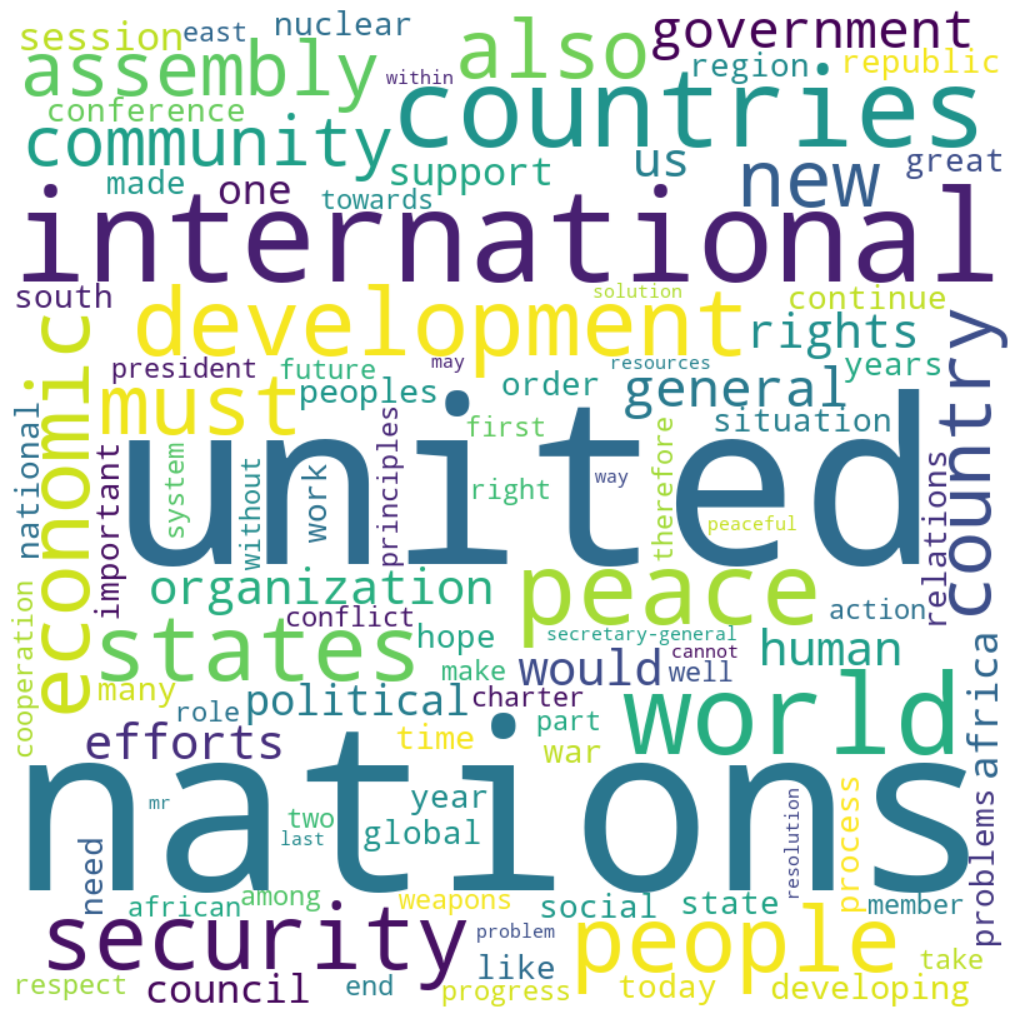

In [105]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# Assuming freq_df is your DataFrame containing the frequency of words
wc = WordCloud(background_color='white', width=800, height=800, max_words=100, margin=2)
wc.fit_words(freq_df['freq'].to_dict())

plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
